# 2. Linear Algebra and Graph Theory

**Abstract:** This lecture gives facts and theorems from linear algebra and graph theory that are important and used in control of multi-agent systems. Python codes are also provided, by which you obtain numerical results and well understand the mathematical facts. 


**Key Points**
- To analyze a graph (or a network), the **graph Laplacian** and the **Perron matrix** play an important role.
- The graph Laplacian (resp. the Perron matrix) has at least **one eigenvalue of 0** (resp. **1**).
- The **connectivity** of a graph can be analyzed by the **multiplicity of the 0 (resp. 1) eigenvalue** of the graph Laplacian (resp. the Perron matrix).
- **NumPy** and **NetworkX** packages are useful for computations in linear algebra and graph theory, respectively.

## 2.1 Coding in Python
In this lecture, we in particular introduce some facts and techniques in linear algebra and graph theory. For this purpose, we first need to **import useful packages** in Python. Namely, coding in Python starts with the following lines:


In [ ]:
# Common initialization
import numpy as np
import networkx as nx
import numpy.linalg as LA

For simplicity, we set floating point precision of matrices and vectors to 2 by:

In [ ]:
np.set_printoptions(precision=2)

## 2.2 Linear Algebra
In this section, we will introduce important facts and theorems in **linear algebra** with **Python codes**. They will be used for analysis and design of multi-agent systems.

### 2.2.1 Finite-dimensional Vector Space
Matrices and vectors are defined in Python using ``array`` function in NumPy (``np``).

For example, 
$$
x = \begin{bmatrix}1\\2\end{bmatrix},\quad
A = \begin{bmatrix}1&2\\3&4\end{bmatrix}
$$
are defined as:

In [ ]:
x = np.array([1,2])
A = np.array([[1,2],[3,4]]) 

**Matrix-vector multiplication** $Ax$ is obtained by
``dot`` function of NumPy as


In [ ]:
b = np.dot(A,x)
print(b)

[ 5 11]


Note that ``x`` is a row vector but you do not need to transpose ``x`` before multiplying it by ``A``. The result is given by ``[ 5 11]``, a row vector.


---

The **norm** of $b=Ax$ is computed by using ``norm`` function in ``numpy.linalg`` submodule, abbreviated as ``LA``:

In [ ]:
norm_b = LA.norm(b, ord=2)
print(norm_b)

12.083045973594572


The second argument `ord=2` indicates the norm is computed with $\ell^2$ norm. If you want to compute the $\ell^1$ norm instead, then you just change it to `ord=1` as:


In [ ]:
print(LA.norm(b, ord=1))

16.0


The rank of $A$ is also easily computed as

In [ ]:
print(LA.matrix_rank(A))

2


---

**Theorem (orthogonal decomposition):**  If a matrix $A\in{\mathbb R}^{m\times n}$ satisfies

$$
    \mathrm{rank}(A) = n
$$

   then $A^\top A$ is non-singular. In this case,
   for any vector $x\in\mathbb{R}^m$ there uniquely exist
   $y \in {\mathcal S}\triangleq {\rm imag}(A)$ and $z\in {\mathcal S}^\perp$, the orthogonal complement of ${\mathcal S}$,
   such that $x=y+z$, and these vectors are given by

$$
    y = A(A^\top A)^{-1}A^\top x,\quad  z = (I-A(A^\top A)^{-1}A^\top)x.
$$


Let's compute the matrices $P = A(A^\top A)^{-1}A^\top$ and $Q = I-P$ in the orthogonal decomposition.

- Define the following $3\times 2$ matrix:
$$
 A = \begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}.
$$

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])

- Compute the **rank** of $A$ by `matrix_rank` funciton in `numpy.linalg` (`LA`)

In [ ]:
print(LA.matrix_rank(A))

2


- The rank of $A$ is 2, and hence the image of matrix $A$ is 
a 2-dimensional linear subspace of $\mathbb{R}^3$. Therefore, $A^\top A$ is non-singular.
So we can compute $P = A(A^\top A)^{-1}A^\top$ as:

In [ ]:
B = np.dot(A.T,A)
C = LA.inv(B)
P = LA.multi_dot([A,C,A.T])

- The first line computes $B = A^\top A$, where
`A.T` is the **transpose** of `A`.
- The second line computes the **inverse** of $B=A^\top A$
using `inv` function in `linalg` submodule of NumPy.
- The third line gives $P=A(A^\top A)^{-1}A^\top$,
where `multi_dot` can compute the **product of two or more matrices**.
- Finally, we compute $Q=I-P$ as:

In [ ]:
Q = np.eye(3) - P

where `np.eye(3)` is the **identity matrix** of size $3\times 3$. The matrices $P$ and $Q$ are given as

In [ ]:
print(P)

[[ 0.83  0.33 -0.17]
 [ 0.33  0.33  0.33]
 [-0.17  0.33  0.83]]


In [ ]:
print(Q)

[[ 0.17 -0.33  0.17]
 [-0.33  0.67 -0.33]
 [ 0.17 -0.33  0.17]]


### 2.2.1 Determinant
Let us compute the **determinant** $\mathrm{det}(A)$ with
$$
 A = \begin{bmatrix}2&3&0&1\\0&1&5&0\\1&0&0&4\\0&7&2&0\end{bmatrix}
$$
Python can easily solve this by `det` funciton in `linalg`.


In [ ]:
A = np.array([[2,3,0,1],[0,1,5,0],[1,0,0,4],[0,7,2,0]])
d = LA.det(A)
print(d)

230.99999999999994


### 2.2.3 Positive and Non-negative Matrices
**Definition (Positive and Non-negative Matrices):**
Let us consider a matrix $A\in {\mathbb R}^{m\times n}$.
If the elements in $A$ are all **positive** (or **non-negative**),
then $A$ is said to be **positive** (or **non-negative**).
We write 

$$A>0 ~~~\text{if $A$ is positive}$$

and

$$A\geq 0 ~~~\text{if $A$ is non-negative}$$.

**Definition (Stochastic matrices):**
Let us consider a non-negative matrix $A=[a_{ij}]\in{\mathbb R}^{n\times n}$.
If the row sums of $A$ are all $1$, that is, if

$$
	a_{i1}+a_{i2}+\cdots+a_{in}=1
$$

holds for all $i\in\{1,2,\ldots,n\}$, then
$A$ is said to be a **stochastic matrix**.

- The condition $a_{i1}+a_{i2}+\cdots+a_{in}=1$ for any $i$
can be also written by

$$
 A{\mathbf 1}_n={\mathbf 1}_n
$$

where ${\mathbf 1}_n\in\mathbb{R}^n$ is a **vector of ones**, that is,

$${\mathbf 1}_n = [1,1,\ldots,1]^\top$$.

- A stochastic matrix $A$ is said to be a **doubly stochastic matrix** if $A^\top$ is also stochastic.


Let us consider the following matrix:

$$
	A_1=\frac{1}{4}\begin{bmatrix}
		2 & 0 & 2\\
		1 & 2 & 1\\
		0 & 2 & 2\\
	\end{bmatrix}.
$$

This is a stochastic matrix. Let's check this by Python by computing $A{\mathbf 1}_n$.


In [ ]:
A1 = np.array([[2,0,2],[1,2,1],[0,2,2]])/4
v = np.ones(3)
print(np.dot(A1,v))

[1. 1. 1.]


where `np.ones(3)` returns the vector of ones of size 3.
From the result, we can say $A$ is stochastic.

Let us another matrix:

$$
	A_2=\frac{1}{4}\begin{bmatrix}
		2 & 0 & 2\\
		1 & 2 & 1\\
		1 & 2 & 1\\
	\end{bmatrix}.
$$

We will show this is doubly stochastic.

For this, we compute $A_2\mathbf{1}_3$ and $A_2^\top \mathbf{1}_3$.

In [ ]:
A2 = np.array([[2,0,2],[1,2,1],[1,2,1]])/4
v = np.ones(3)
print(np.dot(A2,v))
print(np.dot(A2.T,v))

[1. 1. 1.]
[1. 1. 1.]


Hence $A_2$ is doubly stochastic.

### 2.2.4 Eigenvalues
**Definition (Eigenvalues and eigenvectors):**
Let us consider the following equation:

$$
	Ax = \lambda x
$$

where $A\in{\mathbb R}^{n\times n}$ is given and 
$x\in{\mathbb C}^n$ and $\lambda\in{\mathbb C}$
are unknown.
If there exist a scalar $\lambda$ and a non-zero vector $x$
that satisfy the above equation, 
then $\lambda$ is called an **eigenvalue** of $A$
and $x$ is called an **eigenvector** of $A$ associated with $\lambda$.

**Definition (Left eigenvectors):**
If there exists a non-zero row vector
$\xi\in{\mathbb C}^{1\times n}$ and a scalar
$\lambda\in{\mathbb C}$ such that

$$
 \xi A = \lambda \xi
$$

holds, then $\xi$ is called a **left eigenvector** associated with $\lambda$.


**Theorem (eigenvalues):**
1. A scalar $\lambda\in\mathbb{C}$ is an eigenvalue of matrix
$A\in{\mathbb R}^{n\times n}$ if and only if 
the matrix  $\lambda I-A$ is singular.
2. A scalar $\lambda\in\mathbb{C}$ is an eigenvalue of matrix
$A\in{\mathbb R}^{n\times n}$ if and only if 
$\lambda$ is a root of the **characteristic polynomial**
of $A$ defined by

$$
  p_A(s) := \det(sI-A).
$$




**Definition (multiplicity of eigenvalue):**
- Every matrix $A\in{\mathbb R}^{n\times n}$ has exactly $n$ eigenvalues counted with multiplicity.
- The multiplicity of $\lambda$ as a root of the characteristic polynomial $p_A$ is called the **algebraic multiplicity**.
- The number of linearly independent eigenvectors associated with an eigenvalue $\lambda$, or the dimension of 

$$\ker(\lambda I-A) = \{x\in\mathbb{R}^n: (I-A)x=0\}$$

is called the **geometric multiplicity**.
- Every eigenvalue has the geometric multiplicity greater than or equal to 1.
- The geometric multiplicity is always less than or equal to the algebraic multiplicity.
- An eigenvalue is said to be **simple** if its algebraic multiplicity is equal to 1, and hence its geometric multiplicity is also 1.
- An eigenvalue is said to be **semi-simple** if its algebraic multiplicity is equal to its geometric multiplicity.
- If all the eigenvalues are semi-simple, then the matrix is said to be a **semi-simple matrix**.


---

**Example:** Let us consider the following matrix:

$$
	A=\left[\begin{array}{ccc}1&0&0\\0&1&1\\0&0&1\end{array}\right].
$$

- The characteristic polynomial is given by
$p_A(s) = \det(sI-A) = (s-1)^3$.
- The eigenvalues of $A$ are $\{1,1,1\}$ (multiplicity 3),
and the algebraic multiplicity is 3.
- On the other hand,
there are two linearly independent eigenvectors associated with $\lambda=1$,
for example,
$x_1=[1 \ 0 \ 0]^\top$ and $x_2=[0 \ 1 \ 0]^\top$,
and hence the geometric multiplicity is 2 in this case.



Then, we try to check the above facts by using Python.
The eigenvalues and corresponding eigenvectors can be computed as follows:

In [ ]:
A = np.array([[1,0,0],[0,1,1],[0,0,1]])
s, V = LA.eig(A)

The function `eig` returns 3 eigenvalues in vector `s` and corresponding 3 eigenvectors as column vectors in matrix `V`.
Let's look into the values.

In [ ]:
print(s)
print(V)

[1. 1. 1.]
[[ 1.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  1.00e+00 -1.00e+00]
 [ 0.00e+00  0.00e+00  2.22e-16]]


- The first row vector, which is `s`, implies that $A$ has the **eigenvalue 1 with multiplicity 3**.
- Then, the first and second **column vectors** in `V` are linearly independent, but the third column vector
is almost dependent on the second one.
- It follows that there are two linearly independent eigenvectors, and **the geometric multiplicity is 2**.

### 2.2.5 Jordan Canonical Form and Spectral Decomposition

**Definition (Jordan canonical form):**
$A\in\mathbb{R}^{n\times n}$ is similar to matrix $J$ 
(i.e., there exist a non-singular $T$ such that $A=TJT^{-1}$):

$$
 J := {\rm diag}(J_1,J_2,\ldots,J_r)
$$

where $J_1,J_2,\ldots,J_r$ are defined by
\begin{align}
 J_i &:= {\rm diag}\bigl(J_{i1},J_{i2},\ldots,J_{i\alpha_i}\bigr)\in{\mathbb C}^{m_i\times m_i} \quad (i=1,2,\ldots,r)\\
 J_{ij} &:= \left[\begin{array}{cccc}\lambda_i&1& &0\\ &\ddots&\ddots& \\ & &\lambda_i&1\\0& & &\lambda_i\end{array}\right]
 \in {\mathbb C}^{n_{ij}\times n_{ij}} \quad (j=1,2,\ldots,\alpha_i)\\
 m_i &:= \sum_{j=1}^{\alpha_i}n_{ij}.
\end{align}
- $J$ is called the **Jordan canonical form** of $A$
- $J_{ij}$ is called a **Jordan cell**.


Let's compute the Jordan canonical form of

$$
	A=\left[\begin{array}{ccc}1&0&0\\0&1&1\\0&0&1\end{array}\right].
$$

by Python.

In [ ]:
from sympy import Matrix
A = np.array([[-1,-7,2],[1,4,-1],[1,2,0]])
M = Matrix(A)
T, J = M.jordan_form()

- Here we used `SymPy` library, which is useful for **symbolic computation**.
- The third line defines the matrix $A$ as a **symbolic mathematical object**.
- Then, `jordan_form` computes the Jordan canonical form by **symbolic computation**.
- `T` is a matrix that transform `A` to its Jordan canonical form $J$, that is, $A=TJT^{-1}$.

The results are as follows:

In [ ]:
print(T)
print(J)

Matrix([[-1, -2, 1], [0, 1, 0], [-1, 1, 0]])
Matrix([[1, 1, 0], [0, 1, 1], [0, 0, 1]])


That is,

$$
 T = \begin{bmatrix}-1&-2&1\\0&1&0\\-1&1&0\end{bmatrix},\quad
 J = \begin{bmatrix}1&1&0\\0&1&1\\0&0&1\end{bmatrix}.
$$

Note that since this computation is **symbolic**, it takes a significant computational time
for a matrix of a large size.

---

**Theorem (spectral mapping theorem):**
Let us consider a matrix
$A\in{\mathbb R}^{n\times n}$ whose eigenvectors are
$\lambda_1,\lambda_2,\ldots,\lambda_n$ (with multiplicity).
Let $f(s)$ be a polynomial.
Then the eigenvalues of polynomial matrix $f(A)\in{\mathbb R}^{n\times n}$
are $f(\lambda_1),f(\lambda_2),\ldots,f(\lambda_n)$ (with multiplicity).


Let's check the spectral mapping theorem by Python.

Consider the following matrix:

$$
 A = \begin{bmatrix}0&-1&-1\\-1&1&0\\-1&0&1\end{bmatrix}.
$$


The eigenvalues are obtained by

In [ ]:
A = np.array([[0,-1,-1],[-1,1,0],[-1,0,1]])
s, V = LA.eig(A)
print(s)

[-1.  2.  1.]


From this result, the eigenvalues of $A$ are $-1$, $2$, and $1$.
Then, let us consider another matrix

$$
 B = A^2 + A + I.
$$

The eigenvalues of $B$ are obtained from the **spectral mapping theorem** as

$$
 (-1)^2 + (-1) + 1 = 1,\quad
 2^2 + 2 + 1 = 7,\quad
 1^2 + 1 + 1 = 3.
$$

To confirm this, we run the following code:

In [ ]:
B = np.dot(A,A) + A + np.eye(3)
s2, V2 = LA.eig(B)
print(s2)

[1. 7. 3.]


The values are 1, 7, and 3, which are exactly the same as the theoretical values.

### Gershgorin circle theorem
**Theorem (Gershgorin circle theorem):**
For a matrix
$A=[a_{ij}]\in{\mathbb R}^{n\times n}$, define
the following regions in $\mathbb{C}:$

$$
\mathcal{R}_i := \bigg\{z\in {\mathbb C} : |z-a_{ii}| \leq \sum_{j\in\{1,2,\ldots,n\}\setminus\{i\}} |a_{ij}| \bigg\},~~
\mathcal{C}_j := \bigg\{z\in {\mathbb C} : |z-a_{jj}| \leq \sum_{i\in\{1,2,\ldots,n\}\setminus\{j\}} |a_{ij}| \bigg\}, 
$$

for $i,j\in\{1,2,\ldots,n\}$.
Let $\lambda_1,\lambda_2,\ldots,\lambda_n$ be the eigenvalues of $A$.
Then we have

\begin{align*}
 \{\lambda_1,\lambda_2,\ldots,\lambda_n\} \subseteq \mathcal{R}:=\bigcup_{i=1}^n \mathcal{R}_i,\quad
 \{\lambda_1,\lambda_2,\ldots,\lambda_n\} \subseteq \mathcal{C}:=\bigcup_{j=1}^n \mathcal{C}_j,
\end{align*}

and hence
$\{\lambda_1,\lambda_2,\ldots,\lambda_n\} \subseteq \mathcal{R} \cap \mathcal{C}$.

Let us consider the following matrix:

$$
	A=\left[\begin{array}{ccc}1&-6&0\\3&3&2\\-1&0&2\end{array}\right].
$$

We find regions of eigenvalues by using **Gershgorin circle theorem**.
From the theorem,
the sets $\mathcal{R}_i$ and $\mathcal{C}_j$ are given as

$$
\mathcal{R}_1 = \left\{z\in {\mathbb C} : |z-1| \leq 6 \right\},
\mathcal{R}_2 = \left\{z\in {\mathbb C} : |z-3| \leq 5 \right\},
\mathcal{R}_3 = \left\{z\in {\mathbb C} : |z-2| \leq 1 \right\}
$$

$$
\mathcal{C}_1 = \left\{z\in {\mathbb C} : |z-1| \leq 4 \right\},
\mathcal{C}_2 = \left\{z\in {\mathbb C} : |z-3| \leq 6 \right\},
\mathcal{C}_3 = \left\{z\in {\mathbb C} : |z-2| \leq 2 \right\}.
$$

Let's plot the regions by Python.


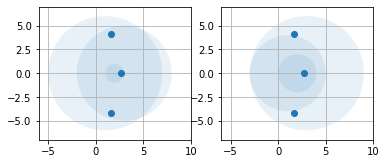

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Matrix A
A = np.array([[1,-6,0],[3,3,2],[-1,0,2]])

# Eigenvalues of A
s, V = LA.eig(A)

# Gershgorin circles R and C
R = []
C = []
for i in range(len(A)):
  center_i = A[i,i]
  radius_Ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
  radius_Ci = np.sum(np.abs(A[:,i])) - np.abs(A[i,i])
  Ri = Circle((center_i, 0), radius_Ri)
  R.append(Ri)
  Ci = Circle((center_i, 0), radius_Ci)
  C.append(Ci)
        
# Plot circles
fig, ax = plt.subplots(1,2)

# Circles in R
p1 = PatchCollection(R, cmap=matplotlib.cm.jet, alpha=0.1)
ax[0].add_collection(p1)
ax[0].axis([-6,10,-7,7])
ax[0].set_aspect('equal',adjustable='box')
ax[0].grid()

# Circles in C
p2 = PatchCollection(C, cmap=matplotlib.cm.jet, alpha=0.1)
ax[1].add_collection(p2)
ax[1].axis([-6,10,-7,7])
ax[1].set_aspect('equal',adjustable='box')
ax[1].grid()

# Plot eigenvalues
ax[0].plot(np.real(s),np.imag(s),'o')
ax[1].plot(np.real(s),np.imag(s),'o')

# Plot figure
plt.show()


### 2.2.7 Eigenvalues of Positive and Non-negative Matrices

**Definition:**
- A matrix $\Pi\in\{0,1\}^{n\times n}$ is called a **permutation matrix** if there is precisely one entry equal to 1 in each row and column, and the other entries are all 0.
- A matrix $A\in{\mathbb R}^{n\times n}$ ($n\geq 2$) is said to be **reducible** if there exists a permutation matrix $\Pi\in{\mathbb R}^{n\times n}$ such that

$$
	\Pi^\top A\Pi = \left[\begin{array}{cc}A_{11}&A_{12}\\0&A_{22}\end{array}\right],\quad \text{$A_{11}$ and $A_{22}$ are square.}
$$

- For $n=1$, $A$ is said to be reducible if $A=0$.
- We say $A\in{\mathbb R}^{n\times n}$ is **irreducible**
if $A$ is not reducible.


**Theorem:**
A matrix $A=[a_{ij}]\in\mathbb{R}^{n\times n}$ with $n\geq 2$ is irreducible if and only if
$(I+{\rm abs}(A))^{n-1}$ is positive, that is,

$$
 \bigl(I+{\rm abs}(A)\bigr)^{n-1}>0
$$

where ${\rm abs}(A)$ is a matrix whose $(i,j)$-entry is
$|a_{ij}|$,
namely, 

$${\rm abs}(A)=\begin{bmatrix}|a_{11}|&\ldots&|a_{1n}|\\ \vdots & \ddots & \vdots\\ |a_{n1}| & \ldots & |a_{nn}|\end{bmatrix}
\in\mathbb{R}^{n\times n}$$

For non-negative matrices, the following theorem is known as
**Perron-Frobenius theorem**.

**Theorem (Perron-Frobenius theorem):**
Let $A\in{\mathbb R}^{n\times n}$ be a non-negative matrix.
Then, the spectral radius $\rho(A)$, the maximum absolute eigenvalue of $A$, is equal to
an eigenvector of $A$,
and there is a non-negative eigenvector (i.e., an eigenvector whose elements are all non-negative)
associated with this eigenvalue.
Moreover, if $A$ is also irreducible,
then the following properties hold:
1. $\rho(A)>0$.
2. $\rho(A)$ is equal to a simple eigenvalue of $A$.
3. There exists a positive eigenvector (i.e., the elements are all positive)  associated with an eigenvalue equal to $\rho(A)$.



For positive matrices, we have the following theorem
called **Perron theorem**.

**Theorem (Peron theorem):**
Suppose $A\in{\mathbb R}^{n\times n}$ is positive. Then 
the following properties hold:
1. $\rho(A)>0$.
2. $\rho(A)$ is equal to a simple eigenvalue of $A$, and the other eigenvalues are strictly less than $\rho(A)$.
3. There exists a positive eigenvector associated with an eigenvalue equal to $\rho(A)$.



---

Now we check the two theorems by Python.

Let us consider the following matrix:

$$
	A_1=\begin{bmatrix}1&0&0\\0&1&1\\0&0&1\end{bmatrix}.
$$

First we compute $(I+\mathrm{abs}(A_1))^{n-1}$ with $n=3$.


In [ ]:
A1 = np.array([[1,0,0],[0,1,1],[0,0,1]])
B1 = np.eye(3) + abs(A1)
print(np.dot(B1,B1))

[[4. 0. 0.]
 [0. 4. 4.]
 [0. 0. 4.]]


Since this matrix is not positive (although it is non-negative), $A_1$ is a **reducible** non-negative matrix.


We then compute the eigenvalues and the spectral radius $\rho(A_1)$ as:

In [ ]:
s, V = LA.eig(A1)
print(s)

[1. 1. 1.]


From this, the eigenvalues of $A_1$ are $\{1,1,1\}$ (multiplicity 3), and hence **the spectral radius
$\rho(A_1)=1$ is equal to the eigenvalue of $A_1$**.

Also, we can take a non-negative eigenvector $[1, 0, 0]^\top$ associated with $\rho(A_1)=1$.

Actually, seeing `V` by `print(V)` we have


In [ ]:
print(V)

[[ 1.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  1.00e+00 -1.00e+00]
 [ 0.00e+00  0.00e+00  2.22e-16]]


---

Let us consider another matrix

$$
	A_2=\begin{bmatrix}1&0&1\\1&1&1\\0&1&1\end{bmatrix}.
$$

Let's compute $(I+{\rm abs}(A_2))^2$:

In [ ]:
A2 = np.array([[1,0,1],[1,1,1],[0,1,1]])
B2 = np.eye(3) + abs(A2)
print(np.dot(B2,B2))

[[4. 1. 4.]
 [4. 5. 5.]
 [1. 4. 5.]]


Therefore $(I+{\rm abs}(A_2))^2>0$, and hence
this is an **irreducible** non-negative matrix.

Let us obtain the eigenvalues and eigenvectors.

In [ ]:
s, V = LA.eig(A2)
print(s)
print(V)

[0.34+0.56j 0.34-0.56j 2.32+0.j  ]
[[ 0.66+0.j    0.66-0.j    0.41+0.j  ]
 [ 0.08-0.49j  0.08+0.49j  0.73+0.j  ]
 [-0.43+0.37j -0.43-0.37j  0.55+0.j  ]]


This implies that the eigenvalues of $A_2$ are $\{0.34\pm0.56{\mathrm j}, 2.32\}$, and the spectral radius
$\rho(A_2)=2.32$ is equal to a simple eigenvalue of $A_2$.
Also, we can take a positive eigenvector $[0.41, 0.73, 0.55]^\top$
associated with eigenvalue $\rho(A_2)=2.32$.

---

Finally, we consider

$$
	A_3=\begin{bmatrix}1&1&1\\2&1&1\\1&1&1\end{bmatrix}.
$$

This is a positive matrix. 
The eigenvalues of $A_3$ are obtained by



In [ ]:
A3 = np.array([[1,1,1],[2,1,1],[1,1,1]])
s, V = LA.eig(A3)
print(s)
print(V)

[ 3.30e+00 -3.03e-01 -1.88e-17]
[[-0.52 -0.37  0.  ]
 [-0.68  0.85 -0.71]
 [-0.52 -0.37  0.71]]


The eigenvalues are $\{3.30, -0.30, 0\}$, and the spectral radius
$\rho(A_3)=3.30$ is equal to a simple eigenvalue $3.30$ of $A_3$.

We can take a positive eigenvector $[0.52, 0.68, 0.52]^\top$
associated with eigenvalue $\rho(A_3)=3.30$.

### 2.2.8 Eigenvalues of Real Symmetric Matrices

**Theorem:**
Every real symmetric $A\in{\mathbb R}^{n\times n}$ is **semi-simple** and **diagonalizable**.
Moreover, the eigenvalues of real symmetric $A$ are **all real** and any two eigenvectors
associated with distinct eigenvalues are **mutually orthogonal**.




**Definition:**
Let $A\in{\mathbb R}^{n\times n}$ be a symmetric matrix.
- We say $A$ is **positive definite**
if $x^\top A x>0$ holds for any non-zero vector $x\in{\mathbb R}^n$.
- We say $A$ is **positive semidefinite**
if $x^\top A x\geq 0$ holds for any $x\in\mathbb{R}^n$.
- We say $A$ is **negative definite**
 (or **negative semidefinite**)
if $-A$ is positive definite (or positive semidefinite).


**Theorem:**
A real symmetric matrix $A\in{\mathbb R}^{n\times n}$ is positive definite (or positive semidefinite)
if and only if the **eigenvalues of $A$ are all positive** (or **non-negative**).

Let us consider the following symmetric matrix:

$$
 A_1 = \begin{bmatrix}2&1\\1&2\end{bmatrix}.
$$

The Python code for the eigenvalues is as follows.

In [ ]:
A1 = np.array([[2,1],[1,2]])
s, V = LA.eig(A1)
print(s)

[3. 1.]


The eigenvalues are $3$ and $1$, and hence $A_1$ is **positive definite** from the above theorem.

Then, we compute the eigenvalues of
$$
 A_2 = \begin{bmatrix}1&1\\1&1\end{bmatrix}.
$$


In [ ]:
A2 = np.array([[1,1],[1,1]])
s, V = LA.eig(A2)
print(s)

[2. 0.]


The eigenvalues of $A_2$ as $0$ and $2$.
It follows from the above theorem
that $A_2$ is **positive semidefinite**.

### 2.2.9 Matrix exponential

**Definition:**
For a square matrix $A\in{\mathbb R}^{n\times n}$, we define
the **matrix exponential** $e^A$ by
$$
 e^{A}:=\sum_{k=0}^\infty \frac{1}{k!}A^k. 
$$


The matrix exponential has the following properties:

**Theorem:**
1. $e^{0} = I$ holds, where $0\in{\mathbb R}^{n\times n}$ is the zero matrix. 
2. If two matrices $A_1\in{\mathbb R}^{n\times n}$ and $A_2\in{\mathbb R}^{n\times n}$ 
are commutative (i.e., $A_1A_2=A_2A_1$), then
$$
 e^{A_1}e^{A_2}=e^{A_1+A_2}
$$
holds. In particular, for any
$A\in{\mathbb R}^{n\times n}$ and any $t_1,t_2\in{\mathbb R}$, we have

$$
e^{At_1}e^{At_2} = e^{A(t_1+t_2)}.
$$

3. For any $A\in{\mathbb R}^{n\times n}$ and any non-singular $T\in{\mathbb R}^{n\times n}$,
we have
$$
 e^{TAT^{-1}}=Te^{A}T^{-1}.
$$

4. For any $A\in{\mathbb R}^{n\times n}$, we have
$e^{A}e^{-A} = I$.
That is, $e^{-A}$ is the inverse matrix of $e^{A}$.

5. Let $\{\lambda_1,\lambda_2,\ldots,\lambda_n\}$ be the eigenvalues of
$A\in{\mathbb R}^{n\times n}$. Then the eigenvalues of 
$e^A$ are given by $\{e^{\lambda_1},e^{\lambda_2},\ldots,e^{\lambda_n}\}$.



In systems and control, the matrix exponential $e^{At}$ with 
**time parameter** $t$ is especially important.
This matrix exponential is related to **linear differential equations**.

**Theorem:**
Let us consider the following differential equation:

$$
 \dot{x}(t) = Ax(t), \quad x(0)=x_0\in{\mathbb R}^n,
$$

where $x(t)$ is a vector in ${\mathbb R}^n$ at time $t\geq 0$.
Then, the solution of the above differential equation is given by

$$
 x(t) = e^{At}x_0,\quad t\geq 0.
$$


---

Let us consider the following matrix:

$$
 A = \begin{bmatrix}1&1&0\\0&1&1\\0&0&1\end{bmatrix}.
$$

We compute the matrix exponential $e^A$ of this matrix by Python.

For the matrix exponential, you need to import 
`linalg` submodule from
`SciPy` (not `NumPy`) library. Then you can use `expm` function
for the matrix exponential.


In [ ]:
from scipy import linalg
A = np.array([[1,1,0],[0,1,1],[0,0,1]])
expA = linalg.expm(A)
print(expA)

[[2.72 2.72 1.36]
 [0.   2.72 2.72]
 [0.   0.   2.72]]


Finally, we look into the **stability**
of a differential equation.
The following theorem is a fundamental theorem of stability.

**Theorem (stability):**
The solution $x(t)$ of the differential equation
$$
  \dot{x}(t) = Ax(t), \quad x(0)=x_0\in{\mathbb R}^n,
$$
converges to zero as $t\rightarrow \infty$ for any initial vector $x(0)=x_0$ if and only if the **eigenvalues** of $A$ lie in the **open
left half plane** $\{z\in\mathbb{C}: \mathrm{Re}(z)<0\}$.

- If the condition in the above theorem holds,
then the matrix $A$ is called a **Hurwitz matrix**.



Let's do simulation of a differential equation with

$$
 A = \begin{bmatrix}0&1&0\\0&0&1\\-1&-2&-1\end{bmatrix}
$$

First, check the eigenvalues:

In [ ]:
A = np.array([[0,1,0],[0,0,1],[-1,-2,-1]])
s, V = LA.eig(A)
print(s)

[-0.57+0.j   -0.22+1.31j -0.22-1.31j]


Since all the eivenbalue of $A$ have negative real parts, and hence $A$ is Hurwitz.

Then do simulation of the system.

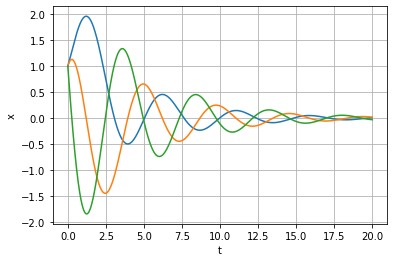

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A = np.array([[0,1,0],[0,0,1],[-1,-2,-1]])

def Ax(x,t,A):
  dxdt = np.dot(A,x)
  return dxdt

x0 = np.array([1,1,1])
t = np.arange(0, 20, 0.001)
x = odeint(Ax, x0, t, args=(A,))

fig, ax = plt.subplots(1,1)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()


We can see that the three elements in the vector $x(t)\in\mathbb{R}^3$ converge to zero as $t$ goes to $\infty$.

## 2.3 Graph Theory

## 2.3.1 What is a graph?

**Definition (graph):**
- A graph is a mathematical object that is useful to model a **network**.
- A graph has multiple **nodes** (or **vertices**), and **edges** that connect nodes.
- Mathematically, a graph is a pair of **sets** of nodes and edges.
For example, if we have the node set
$\cal{V}=\{1,2,\ldots,n\}$ and the edge set
$\cal{E} \subset \cal{V}\times\cal{V}$,
then the graph is defined as
$G=(\cal{V},\cal{E})$.
- **Undirected graphs** have no directed edges.
- **Directed graphs** (or **digraph**) have directed edges.

**NetworkX** package is used to define a graph in Python:


In [ ]:
# Common initialization
import numpy as np
import networkx as nx
import numpy.linalg as LA

np.set_printoptions(precision=2)


In [ ]:
import networkx as nx
G1 = nx.DiGraph() #Directed graph
V = [1,2,3,4] #Set of nodes
G1.add_nodes_from(V)
E = [(1,2),(1,3),(3,2),(3,4),(4,1)] #Set of edges
G1.add_edges_from(E)

- The first line imports **NetworkX** package.
- In the second line, an empty graph object \texttt{G} of a **directed graph** is generated by
`DiGraph` function in NetworkX package.
- For an undirected graph, you need to use 
`nx.Graph()`.
- The third line defines the **node set** $\mathcal{V}=\{1,2,3,4\}$,
and the fourth line puts this set into the graph object `G`.
- Also, the fifth line defines the **edge set**

$$
 \mathcal{E}=\{(1,2), (1,3), (3,2), (3,4), (4,1)\},
$$

and the sixth line adds this in `G`.


**Graph visualization:**
Then, let us **visualize** this graph by `draw` function in NetworkX.
You can do the following:

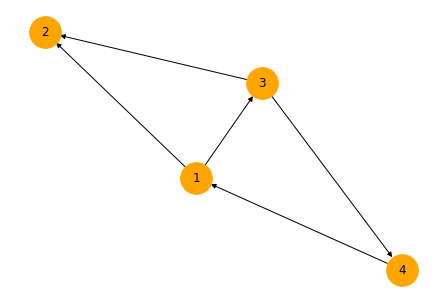

In [ ]:
nx.draw(G1, node_size=1000, 
          node_color='orange', with_labels=True)

**Zachary's network:**
A graph with the nodes of the 34 members of the Karate club,
and the 78 edges of the true relationship between club members who
regularly interacted outside the club.


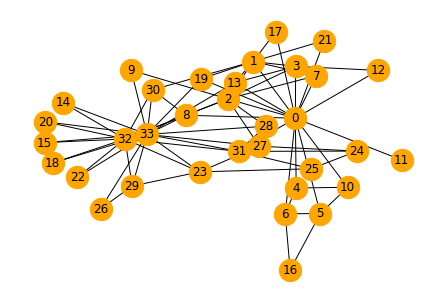

In [ ]:
G2 = nx.karate_club_graph()
nx.draw(G2, node_size=500, 
          node_color='orange', with_labels=True)

**Definition (degree):**
Let us consider a directed graph $G=(\mathcal{V},\mathcal{E})$.
- For a node $i\in\mathcal{V}$,
the number of head ends adjacent to $i$ is called the **in-degree**,
and denoted by $d_i^{\mathrm{in}}$.
- Likewise, the number of tail ends adjacent to $i$ is called the **out-degree**
and denoted by $d_i^{\mathrm{out}}$. 
- The **maximum degree** is the maximum number between the in-degrees of $i\in\mathcal{V}$, namely,

$$
\Delta:=\max_{i\in\mathcal{V}} d^{\mathrm{in}}_i. 
$$

- For a directed graph $G$, it is said to be **balanced**
if $d_i^{\mathrm{in}}=d_i^{\mathrm{out}}$ for all $i \in \mathcal{V}$.


Let's compute the in- and out-degrees of `G1` as defined above.

In [ ]:
print(G1.in_degree())
print(G1.out_degree())

[(1, 1), (2, 2), (3, 1), (4, 1)]
[(1, 2), (2, 0), (3, 2), (4, 1)]


Namely, we have

$$
 \begin{split}
 d_1^{\mathrm{in}} &= 1, ~~
 d_2^{\mathrm{in}} = 2, ~~
 d_3^{\mathrm{in}} = 1, ~~
 d_4^{\mathrm{in}} = 1, \\
 d_1^{\mathrm{out}} &= 2, ~~
 d_2^{\mathrm{out}} = 0, ~~
 d_3^{\mathrm{out}} = 2, ~~
 d_4^{\mathrm{out}} = 1,
 \end{split}
$$


- For an undirected graph, we only define the **degree**
 of node $i\in\mathcal{V}$,
the number of edges connected with $i$.
- Note that **every undirected graph is balanced**.

Let's compute the maximum degree $\Delta$ of
Zachary's Karate Club network by Python:

In [ ]:
G2_degrees = [di for (i,di) in G2.degree()]
print(G2_degrees)

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


In [ ]:
print(max(G2_degrees))

17


Let's draw a balanced graph.

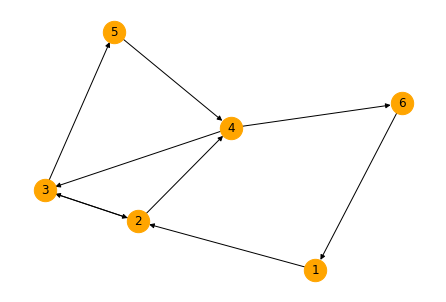

In [ ]:
G3 = nx.DiGraph() #Directed graph
V = [1,2,3,4,5,6] #Set of nodes
G3.add_nodes_from(V)
E = [(1,2),(2,3),(2,4),(3,2),(3,5),(4,3),(4,6),(5,4),(6,1)] #Set of edges
G3.add_edges_from(E)
nx.draw(G3, node_size=500, 
          node_color='orange', with_labels=True)

You can check this is balanced by checking in- and out-degrees:

In [ ]:
print(G3.in_degree())
print(G3.out_degree())

[(1, 1), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1)]
[(1, 1), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1)]


### 2.3.2 Connectivity

**Definition (directed path):**
For a directed graph $G=(\mathcal{V},\mathcal{E})$,
a **directed path** of length $m$ is a sequence of nodes in $\mathcal{V}$
as

$$
 \{i_0,i_1,\ldots,i_m\}
$$

where $(i_k,i_{k+1})\in\mathcal{E}$ for any $k \in \{0,1,\ldots,m-1\}$.

- Intuitively, a path is a trajectory of your pen drawn from $i_0$ to $i_m$ 
through edges of the graph with a single stroke.



**Example:**
Let's consider the digraph `G3`:

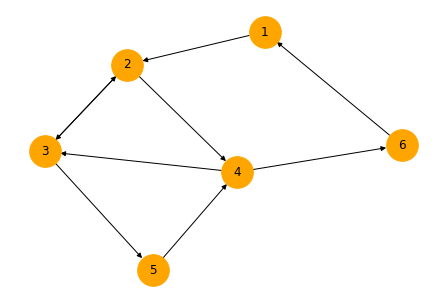

In [ ]:
nx.draw(G3, node_size=1000, 
          node_color='orange', with_labels=True)

The sequence $\{1,2,4,6\}$ is a directed path from $1$ to $6$,
and $\{1,2,3,5,4,3,5,4,6\}$ is another directed path from $1$ to $6$.


**Definition (connectivity):**
Let us consider a **directed** graph (**digraph**) $G=(\mathcal{V},\mathcal{E})$.
- Two nodes $i,j\in\mathcal{V}$ are said to be **connected**
if there exists a path from $i$ to $j$.
- If any nodes $i,j\in\mathcal{V}$ are connected to each other,
then the directed graph $G$ is said to be **strongly connected**.
- A directed graph is said to be **weakly connected**
if it is connected as an undirected graph by replacing all directed edges by undirected edges.

(Note) If $G$ is **undirected**, we just say **connected** instead of strongly connected.


**Example:**
Graph `G1`

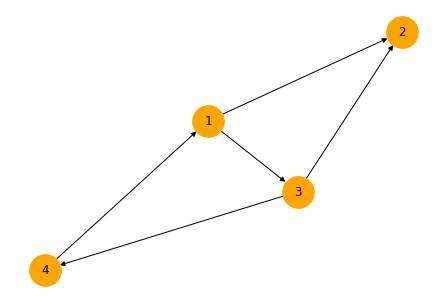

In [ ]:
nx.draw(G1, node_size=1000, 
          node_color='orange', with_labels=True)

`G1` is not strongly connected
since there is no path from $2$ to the other nodes, but it is **weakly connected**.

**Example:** Grpah `G3`

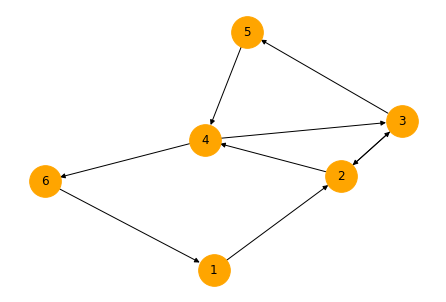

In [ ]:
nx.draw(G3, node_size=1000, 
          node_color='orange', with_labels=True)

`G3` is **strongly connected**. (How to check? Use graph Laplacian, which we will see later)

**Definition (directed tree):**
A **directed tree** is a directed graph that has the following properties:
- there is one node called the **root** whose in-degree is zero.
- all nodes but the root have **in-degree one**.
- there exists a directed path from the root to each node.



**Example:** Draw a directed tree by Python. For a directe tree, we use `graphviz_layout` function that gives a beautiful position of
the nodes.

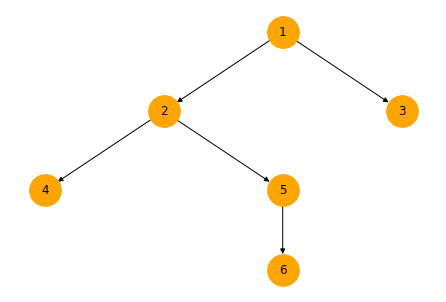

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout
G4 = nx.DiGraph()
V = [1,2,3,4,5]
E = [(1,2),(1,3),(2,4),(2,5),(5,6)]
G4.add_nodes_from(V)
G4.add_edges_from(E)
pos = graphviz_layout(G4, prog="dot")
nx.draw(G4, pos, node_size=1000, 
          node_color='orange', with_labels=True)

### 2.3.3 Spanning Tree

**Definition (spanning tree):**
Let us consider a graph $G=(\mathcal{V},\mathcal{E})$,
and another graph $G'=(\mathcal{V}',\mathcal{E}')$.
- If $G$ and $G'$ satisfy
$\mathcal{V}'\subset\mathcal{V}$ and $\mathcal{E}'\subset\mathcal{E}$,
then we say $G'$ is a **subgraph** of $G$,
and write $G'\subset G$.
- In particular, if $G'\subset G$ and $\mathcal{V}'=\mathcal{V}$,
then we call $G'$ a **spanning subgraph** of $G$.
- A **spanning tree** is a spanning subgraph that is a (directed) tree.

**Example:**
With Python, you can easily find a spanning tree for a given directed or undirected graph.
Let us consider Zachary's graph `G2`.

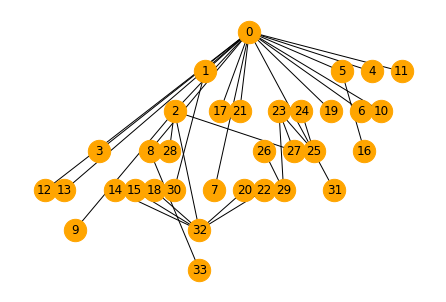

In [ ]:
T = nx.minimum_spanning_tree(G2)
pos = graphviz_layout(G2, prog="dot")
nx.draw(T, pos, node_size=500, 
          node_color='orange', with_labels=True)

The function `minimum_spanning_tree` in NetworkX computes
the **minimum spanning tree** that is a spanning tree with
the minimum number of edges.

### 2.3.4 Graph Laplacian

We here consider matrix representations of a graph.

**Definition (adjacency matrix):**
The **adjacency matrix** $A$ of a graph $G=(\mathcal{V},\mathcal{E})$ is defined by

$$
 a_{ij} = \begin{cases}1,& \text{if}~~ (i,j)\in\mathcal{E}\\ 0, & \text{otherwise}\end{cases}
$$

where $a_{ij}$ is the $(i,j)$-th element of matrix $A$.

- If the number of nodes is $n$, the size of adjacency matrix becomes $n\times n$.
- The adjacency matrix indicates that 
  - if there **exists an edge** from $i$ to $j$, then
$a_{ij}$ is $1$, 
  - if no link from $i$ to $j$, then $a_{ij}=0$.
- For any **undirected** graph, its adjacency matrix is a **symmetric** matrix,
since if $(i,j)\in\mathcal{E}$ then $(j,i)\in\mathcal{E}$ always holds.
- For a directed graph, its adjacency matrix is not necessarily symmetric.



**Defintion (degree matrix):**
For a graph $G=(\mathcal{V},\mathcal{E})$,
the **degree matrix** $D$ is 
a diagonal matrix whose $(i,i)$-th element is the **in-degree** (or the **degree** for an **undirected** graph)
$d_i^{\mathrm{in}}$ of node $i\in\mathcal{V}$, that is,

$$
 D := \mathrm{diag}(d_1^{\mathrm{in}},d_2^{\mathrm{in}},\ldots,d_n^{\mathrm{in}})=
  \begin{bmatrix}
  d_1^{\mathrm{in}} & 0 & \ldots & 0\\ 
  0 & d_2^{\mathrm{in}} & \ddots & \vdots\\
  \vdots & \ddots & \ddots & 0\\
  0 & \ldots & 0 & d_n^{\mathrm{in}}
 \end{bmatrix}
$$

**Definition (graph Laplacian):**
The **graph Laplacian** $L$ of a graph $G=(\mathcal{V},\mathcal{E})$ is defined by

$$
 L := D - A,
$$

where $A$ is the **adjacency matrix** of $G$, and 
$D$ is the **degree matrix**.

**Lemma 2.1**
For any undirected graph $G$, its graph Laplacian is symmetric.

**Example:**
In Python, you can easily obtain the adjacency matrix and the graph Laplacian using
functions in NetworkX.
Let us first compute the adjacency matrix of the directed graph `G1`
using `adjacency_matrix` function.
- **Note:** In Python, the adjacency matrix is defined as $a_{ij}=1$ if $(i,j)\in\mathcal{E}$, which is the **transpose** of $A$ defined above.


In [ ]:
A1 = nx.adjacency_matrix(G1).T # Adjacency matrix
print(A1)

  (1, 0)	1
  (2, 0)	1
  (1, 2)	1
  (3, 2)	1
  (0, 3)	1


- This is **sparse matrix representation** of the adjacency matrix,
where only the **nonzero** elements in the matrix are shown.
- For example, `(0, 1) 1` indicates there is an edge from node `0` to node `1`,
  - **Note:** In Python, the index starts from `0` not `1`, which is the same as C (or C++), but different from MATLAB.
- Also we can see there is no edge from `0` to `3`.
- The adjacency matrix in a usual matrix form is also obtained
by using `todense` function.


In [ ]:
print(A1.todense())

[[0 0 0 1]
 [1 0 1 0]
 [1 0 0 0]
 [0 0 1 0]]


We also compute the graph Laplacian as follows:

In [ ]:
G1_degree = [di for (i,di) in G1.in_degree()] # In-degrees
D1 = np.diag(G1_degree) # Degree matrix D
L1 = D1 - A1 # graph Laplacian L
print(L1)

[[ 1  0  0 -1]
 [-1  2 -1  0]
 [-1  0  1  0]
 [ 0  0 -1  1]]


Also, we compute the graph Laplacian of the undirected graph `G2` (Karate Club):


In [ ]:
A2 = nx.adjacency_matrix(G2).T # Adjacency matrix A
G2_degree = [di for (i,di) in G2.degree()] # Degrees
D2 = np.diag(G2_degree) # Degree matrix D
L2 = D2 - A2 # graph Laplacian L
print(L2)

[[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]


**Theorem 2.18**
Let $L\in \mathbb{R}^{n\times n}$ be the graph Laplacian of a graph $G$.
1. The graph Laplacian $L$ has **at least one eigenvalue of 0**, and 
${\mathbf 1}_n=[1 \ 1 \ \cdots \ 1]^\top\in\mathbb{R}^n$ is an eigenvector of eigenvalue 0.
That is,  $L{\mathbf 1}_n=0$ holds.
2. $\mathrm{rank}(L) \leq n-1$.
3. The eigenvalues of $L$ except for $0$ lie in the **open right half plane** of $\mathbb{C}$.
4. The eigenvalue 0 of $L$ is **semi-simple** (i.e., algebraic multiplicity $=$ geometric multiplicity).
5. The eigenvalue 0 of $L$ is simple (i.e., algebraic multiplicity  $=$ geometric multiplicity $=1$) if and only if $\mathrm{rank}(L)=n-1$.



**Example:** Let us consider the graph Laplacian of `G1`, and compute the eigenvalues and eigenvectors.

In [ ]:
s, V = LA.eig(L1) # eigs of the graph Laplacian L1 of G1

The eigenvalues of `G1` are

In [ ]:
print(s)


[2.00000000e+00+0.j        8.88365811e-17+0.j
 1.50000000e+00+0.8660254j 1.50000000e+00-0.8660254j]


We can see that one eigenvalue is **almost zero** and the other lie in the **open right half plane**.

Then let's compute $L\mathbf{1}_n$.

In [ ]:
np.dot(L1,np.ones(4))

matrix([[0., 0., 0., 0.]])

This shows that $L\mathbf{1}_n = 0$.

**Theorem 2.19**
A graph $G$ is balanced if and only if ${\mathbf 1}_n^\top$ is a left eigenvector
associated with the eigenvalue 0 of the graph Laplacian.
In other words, $L^\top {\mathbf 1}_n = 0$ holds.


Let us consider the balanced graph `G3`.
The graph Laplacian of `G3` is obtained by

In [ ]:
A3 = nx.adjacency_matrix(G3).T # Adjacency matrix A
G3_degree = [di for (i,di) in G3.in_degree()] # Degrees
D3 = np.diag(G3_degree) # Degree matrix D
L3 = D3 - A3 # graph Laplacian L
print(L3)

[[ 1  0  0  0  0 -1]
 [-1  2 -1  0  0  0]
 [ 0 -1  2 -1  0  0]
 [ 0 -1  0  2 -1  0]
 [ 0  0 -1  0  1  0]
 [ 0  0  0 -1  0  1]]


Check if $L\mathbf{1}_n=0$ and $L^\top\mathbf{1}_n=0$ hold.

In [ ]:
print(np.dot(L3,np.ones(6)))
print(np.dot(L3.T,np.ones(6)))


[[0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]]


### 2.3.5 Perron matrix

**Definition (Perron matrix):**
Let us consider a graph $G=(\mathcal{V},\mathcal{E})$ and its graph Laplacian
$L  \in \mathbb{R}^{n \times n}$. We define the **Perron matrix**
$P \in \mathbb{R}^{n \times n}$ of $G$ with a parameter $\epsilon>0$ by

$$
 P := I - \epsilon L.
$$


**Theorem 2.20**
Let $P\in \mathbb{R}^{n \times n}$ be the Perron matrix
with $\epsilon>0$ of a graph $G$.
The following properties hold:

1. $P$ has at least one **eigenvalue of 1**,
and **${\mathbf 1}_n$ is an eigenvector** associated with eigenvalue $1$, that is, $P {\mathbf 1}_n = {\mathbf 1}_n$ holds.
2. Assume $\epsilon\Delta<1$ holds where $\Delta$ is the maximum in-degree of graph $G$. Then the eigenvalues of $P$ except for $1$ lie in the **open unit circle** of $\mathbb{C}$.
3. The eigenvalue 1 of $P$ is **semi-simple**.

**Example:**
Let's compute the Perron matrix for the balanced graph `G3` and see the eigenvalues.

In [ ]:
epsilon = 0.1
P3 = np.eye(6) - epsilon * L3
s, V = LA.eig(P3)
print(s)

[1.        +0.j         0.74810872+0.06666098j 0.74810872-0.06666098j
 0.90189128+0.06025654j 0.90189128-0.06025654j 0.8       +0.j        ]


We can see that one eigenvalue is one. To check if the other eigenvalues line in the open unit circle, let's compute their absolute values:

In [ ]:
print(np.abs(s))

[1.         0.7510728  0.7510728  0.90390195 0.90390195 0.8       ]


We can see they are in the open unit circle.

### 2.3.6 Graph Analysis with Graph Laplacian and Perron Matrix
We can draw some important information of a graph from the eigenvalues of the graph Laplacian
and the Perron matrix.

**Theorem 2.21 (spanning tree)**
Let $G$ be a **directed graph**. The following statements are equivalent:
1. $G$ has a **spanning tree**.
2. The graph Laplacian $L$ of $G$ has a **simple eigenvalue of 0**.
3. The Perron matrix $P$ of $G$ has a **simple eigenvalue of 1**.

**Corollary 2.1**
Let $G$ be an **undirected graph**. The following statements are equivalent:
1. $G$ is **connected**.
2. The graph Laplacian $L$ of $G$ has a **simple eigenvalue of 0**.
3. The Perron matrix $P$ of $G$ has a **simple eigenvalue of 1**.

**Example:**
Let us consider the directed graph `G1`.
The graph Laplacian `L1` has a simple eigenvalue of 0:

[2.00e+00+0.j   8.88e-17+0.j   1.50e+00+0.87j 1.50e+00-0.87j]


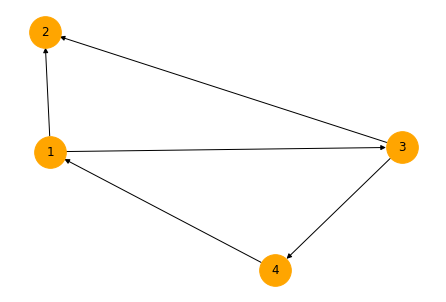

In [ ]:
nx.draw(G1, node_size=1000, 
          node_color='orange', with_labels=True)
s, V = LA.eig(L1)
print(s)

Therefore, from **Theorem 2.21**, `G1` has a spanning tree.
Actually, the path {4, 1, 3, 2} is a spanning tree.

Finally, we introduce some useful facts on the graph Laplacian and the Perron matrix.

**Lemma 2.5**
Consider a graph $G$ which has a spanning tree. 
Let $\Delta$ be the maximum in-degree of $G$.

1. Let $L\in{\mathbb R}^{n\times n}$ be the graph Laplacian
and 
let $v_1\in{\mathbb R}^{1\times n}$ be a left eigenvector of $L$ associated with its zero eigenvalue. 
Then

$$
\lim_{t\to \infty} e^{-Lt} = \left(\frac{1}{v_1{\mathbf 1}_n  }\right) {\mathbf 1}_n v_1.
$$

2. Let $P\in{\mathbb R}^{n\times n}$ be the Perron matrix 
for an arbitrarily given  $\epsilon>0$,
and 
let $w_1\in{\mathbb R}^{1\times n}$ be a left eigenvector of $P$ associated with the eigenvalue 1. 
If $\epsilon \Delta < 1$, then

$$
\lim_{k\to \infty} P^k = \left(\frac{1}{w_1{\mathbf 1}_n }\right) {\mathbf 1}_n w_1.
$$


**Example:**
Let's check **Lemma 2.5** by using the balanced graph `G3`.
First, we compute the left eigenvectors of the graph Laplacian `L3`
by the transpose of `L3`:

In [ ]:
l, W = LA.eig(L3.T)
print(l)
print(W)

[2.09e-16+0.j   9.81e-01+0.6j  9.81e-01-0.6j  2.52e+00+0.67j
 2.52e+00-0.67j 2.00e+00+0.j  ]
[[-0.41+0.j    0.01-0.4j   0.01+0.4j   0.26-0.05j  0.26+0.05j -0.41+0.j  ]
 [-0.41+0.j   -0.24-0.02j -0.24+0.02j -0.44-0.09j -0.44+0.09j  0.41+0.j  ]
 [-0.41+0.j   -0.42+0.02j -0.42-0.02j  0.57+0.j    0.57-0.j   -0.41+0.j  ]
 [-0.41+0.j    0.17+0.11j  0.17-0.11j -0.4 +0.34j -0.4 -0.34j  0.41+0.j  ]
 [-0.41+0.j   -0.18+0.29j -0.18-0.29j  0.14-0.29j  0.14+0.29j -0.41+0.j  ]
 [-0.41+0.j    0.67+0.j    0.67-0.j   -0.13+0.09j -0.13-0.09j  0.41+0.j  ]]


Now compute the matrix $\left(\frac{1}{v_1{\mathbf 1}_n  }\right) {\mathbf 1}_n v_1$

In [ ]:
v1 = np.matrix(W[:,0])
one = np.matrix(np.ones(6))
print(np.dot(v1,one)/np.dot(one,v1))

[[0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]
 [0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]
 [0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]
 [0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]
 [0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]
 [0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j 0.17-0.j]]


Then we compute $e^{-Lt}$ for $t=0,1,2,\ldots,9$:

In [ ]:
from scipy import linalg

for t in range(10):
  expLt = linalg.expm(-L3 * t)
  print(t)
  print(expLt)

0
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
1
[[0.38 0.04 0.02 0.14 0.05 0.37]
 [0.27 0.25 0.18 0.12 0.04 0.15]
 [0.14 0.25 0.27 0.18 0.11 0.05]
 [0.12 0.21 0.18 0.2  0.25 0.04]
 [0.05 0.14 0.28 0.11 0.41 0.01]
 [0.04 0.12 0.07 0.25 0.14 0.38]]
2
[[0.19 0.11 0.09 0.19 0.13 0.29]
 [0.22 0.16 0.14 0.16 0.11 0.21]
 [0.19 0.19 0.19 0.16 0.14 0.13]
 [0.16 0.18 0.2  0.15 0.19 0.11]
 [0.13 0.19 0.24 0.14 0.24 0.07]
 [0.11 0.16 0.15 0.19 0.19 0.19]]
3
[[0.16 0.15 0.14 0.18 0.16 0.21]
 [0.18 0.16 0.15 0.17 0.15 0.2 ]
 [0.18 0.17 0.17 0.16 0.15 0.16]
 [0.17 0.17 0.18 0.16 0.17 0.15]
 [0.16 0.18 0.2  0.15 0.18 0.12]
 [0.15 0.17 0.17 0.17 0.18 0.16]]
4
[[0.16 0.16 0.16 0.17 0.17 0.18]
 [0.17 0.16 0.16 0.17 0.16 0.18]
 [0.17 0.17 0.16 0.17 0.16 0.17]
 [0.17 0.17 0.17 0.16 0.17 0.16]
 [0.17 0.17 0.18 0.16 0.17 0.15]
 [0.16 0.17 0.17 0.17 0.17 0.16]]
5
[[0.16 0.17 0.17 0.17 0.17 0.17]
 [0.17 0.17 0.16 0.17 0.17 0.17]

It converges to $\left(\frac{1}{v_1{\mathbf 1}_n  }\right) {\mathbf 1}_n v_1$ as mentioned in **Lemma 2.5**.

---

# **That's it! Thank you for your kind attention!!**


